<a href="https://colab.research.google.com/github/Alex112525/Neural-Networks-with-TensorFlow/blob/main/Preprocessing_and_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt 

##Preprocessing and cleaning our datasets are important steps in preparing data for use in machine learning models. 

Some of the reasons why these steps are important include:

1. **Improving model accuracy:** By removing inconsistencies and errors in the data, we can improve the accuracy of the machine learning models trained on that data.

2. **Avoiding bias:** Data preprocessing helps to eliminate bias that may be present in the data, which can improve the fairness and validity of the models we build.

3. **Saving time:** Preprocessing and cleaning the data can help to speed up the model building process, as we can avoid errors and inconsistencies that would otherwise need to be addressed later on.

4. **Easier data integration:** Clean and well-organized data is easier to integrate with other datasets, which can be useful when working with data from multiple sources.

5. **Better data understanding:** Preprocessing and cleaning the data can also help us gain a better understanding of the data, which can lead to more insights and better decision-making.

#Import dataset

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip \
    -O /tmp/databasesLoadData.zip

--2023-02-17 02:52:36--  https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.128, 142.251.107.128, 74.125.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71662510 (68M) [application/zip]
Saving to: ‘/tmp/databasesLoadData.zip’

/tmp/databasesLoadD 100%[===================>]  68.34M  99.5MB/s    in 0.7s    

2023-02-17 02:52:37 (99.5 MB/s) - ‘/tmp/databasesLoadData.zip’ saved [71662510/71662510]



In [3]:
#Unzip File
local_zip = "/tmp/databasesLoadData.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/databasesLoadData")
zip_ref.close()

#Load from CSV

In [4]:
train = pd.read_csv("/tmp/databasesLoadData/sign_mnist_train/sign_mnist_train_clean.csv")
test = pd.read_csv("/tmp/databasesLoadData/sign_mnist_test/sign_mnist_test.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

In Pandas library, **head()** returns the first n rows (default 5) of the dataframe. This is useful to check if the dataset was correctly loaded, to have a glimpse of the structure of the data, and to see if any data cleaning is necessary.

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


**"train["label"].unique()"** returns the unique values in the column "label" of the DataFrame train. 

The method returns a numpy array of the unique values.

In [6]:
train["label"].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

## Reviewing the distribution in our datasets is important for several reasons:

1. **Data quality check:** Checking the distribution of variables in a dataset can help identify any data quality issues, such as outliers or errors. Outliers or errors can have a significant impact on the statistical properties of the data, and therefore on the results of any analysis performed on the data.

2. **Feature selection:** Understanding the distribution of variables in a dataset can help identify which variables are more or less important in a particular analysis. Features that are highly skewed or that have low variance may be less informative, and may not contribute significantly to the analysis.

3. **Model performance:** The distribution of variables can also have an impact on the performance of machine learning models. Models may perform differently on data that is normally distributed, versus data that is highly skewed or has a heavy-tailed distribution.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


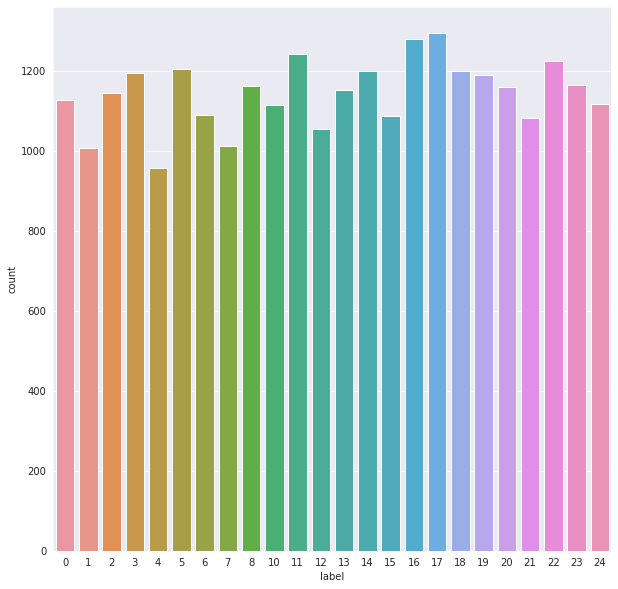

In [7]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(train["label"])

In [8]:
y_train = train["label"]
y_test = test["label"]

del train["label"]
del test["label"]

The **info()** function is a method that provides a concise summary of a pandas DataFrame. 

It shows the total number of entries, the data types of each column, and the number of non-null values in each column. 
It also displays memory usage, which can be useful for identifying memory issues when working with large datasets. Additionally, it can show the top and bottom rows of the DataFrame. 

This function is useful for quickly inspecting the structure and contents of a DataFrame.

In [9]:
train.info() #General info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 784 entries, pixel1 to pixel784
dtypes: object(784)
memory usage: 164.2+ MB


The **dtypes** attribute in Pandas provides the data type of each column in a DataFrame. It can be used to check the type of data stored in each column of a DataFrame.

In [10]:
train.dtypes #tipos de datos 

pixel1      object
pixel2      object
pixel3      object
pixel4      object
pixel5      object
             ...  
pixel780    object
pixel781    object
pixel782    object
pixel783    object
pixel784    object
Length: 784, dtype: object

Check for missing data in our training set

In [11]:
train.isnull().values.any()

False

Check for duplicated data in our training set

In [12]:
train[train.duplicated()]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew
861,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew


Remove the duplicated data in our training set

In [13]:
train = train.drop([317,487,595,689,802,861], axis = 0)
y_train = y_train.drop([317,487,595,689,802,861], axis = 0)

Re-check for duplicated

In [14]:
train[train.duplicated()]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784


Check if there is any data with text to be deleted 


In [15]:
train[train["pixel1"] == "fwefew"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
727,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew


In [16]:
train = train.drop([727], axis = 0)
y_train = y_train.drop([727], axis = 0)

The code train.astype(str).astype(int) first converts all the values in the pandas dataframe train to strings using astype(str) and then converts the strings to integers using astype(int). 

This code is used when you have a dataframe with mixed data types (such as strings and integers) and you want to convert the entire dataframe to a single data type, such as integers in this case.

Note that this code will raise an error if any of the values in the dataframe cannot be converted to an integer.

In [17]:
train = train.astype(str).astype(int) 

Normalizing the data is important in machine learning to ensure that all features have a similar scale, so that none of them dominate the others and to improve model performance.

In [18]:
train = train/255

In [19]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961
